In [ ]:
import numpy as np 
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from plotly.subplots import make_subplots
import folium
import matplotlib.font_manager as fm

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported!")

Libraries imported!


In [ ]:
!pip install -U -q kaggle==1.5.12
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
font = fm.FontProperties(fname=path, size=15)

!cp /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf /content/drive/MyDrive/빅데이터분석/bigdataproject/fonts

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
os.environ["KAGGLE_USERNAME"] = 'skmn12'
os.environ["KAGGLE_KEY"] = "fdf0e7a1d6807140494131cdccbb8655"

In [ ]:
!cp /content/drive/MyDrive/빅데이터분석/bigdataproject/kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle

In [ ]:
!kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning

learnplatform-covid19-impact-on-digital-learning.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '*.zip'

Archive:  learnplatform-covid19-impact-on-digital-learning.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  

In [ ]:
files = glob.glob("engagement_data/*.csv")
list_of_df = [pd.read_csv(file).assign(district_id=os.path.basename(file).strip(".csv")) for file in files]

In [ ]:
engagement = pd.concat(list_of_df, ignore_index= True)

In [ ]:
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,19044.0,0.05,8.73,6104
1,2020-01-01,13591.0,0.00,NaN,6104
2,2020-01-01,55007.0,0.02,0.35,6104
3,2020-01-01,96116.0,0.00,NaN,6104
4,2020-01-01,29790.0,0.05,1.42,6104


In [ ]:
engagement.shape

(22324190, 5)

In [ ]:
district = pd.read_csv("districts_info.csv")
product = pd.read_csv("products_info.csv")

In [ ]:
district.shape

(233, 7)

In [ ]:
district.head(10)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
8,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
9,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["


In [ ]:
product.shape

(372, 6)

In [ ]:
product.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [ ]:
percent_nan_engagement = (engagement.isnull().sum().sort_values(ascending = False)/len(engagement))*100
percent_nan_engagement

engagement_index    24.092292
pct_access           0.060235
lp_id                0.002423
time                 0.000000
district_id          0.000000
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothicBold')

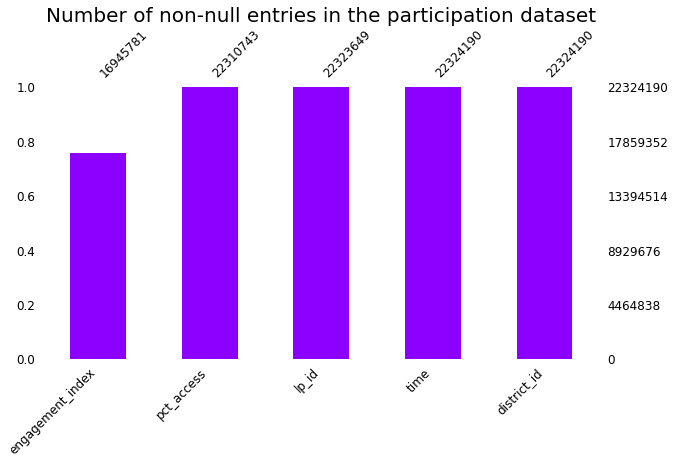

In [ ]:
msno.bar(engagement, color='#8b00ff', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in the participation dataset", size=20) # 참여 데이터 세트의 null이 아닌 항목 수
plt.show()

In [ ]:
percent_nan_district = (district.isnull().sum().sort_values(ascending = False)/len(district))*100
percent_nan_district

pp_total_raw                49.356223
pct_free/reduced            36.480687
county_connections_ratio    30.472103
state                       24.463519
locale                      24.463519
pct_black/hispanic          24.463519
district_id                  0.000000
dtype: float64

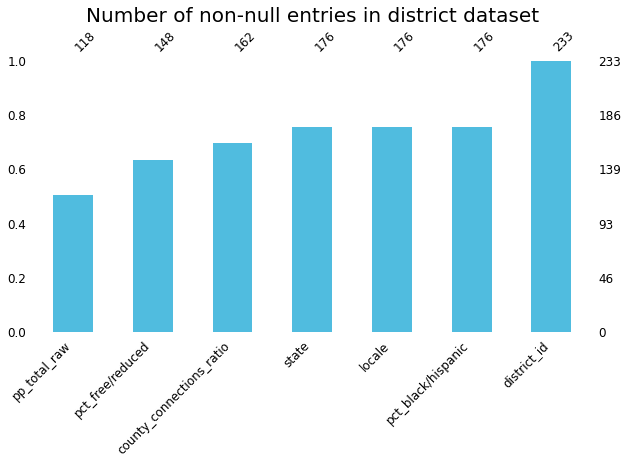

In [ ]:
msno.bar(district, color='#50bcdf', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in district dataset", size=20) # district 데이터 세트의 null이 아닌 항목 수
plt.show()

In [ ]:
percentnan_product = (product.isnull().sum().sort_values(ascending = False)/len(product))*100
percentnan_product

Sector(s)                     5.376344
Primary Essential Function    5.376344
Provider/Company Name         0.268817
LP ID                         0.000000
URL                           0.000000
Product Name                  0.000000
dtype: float64

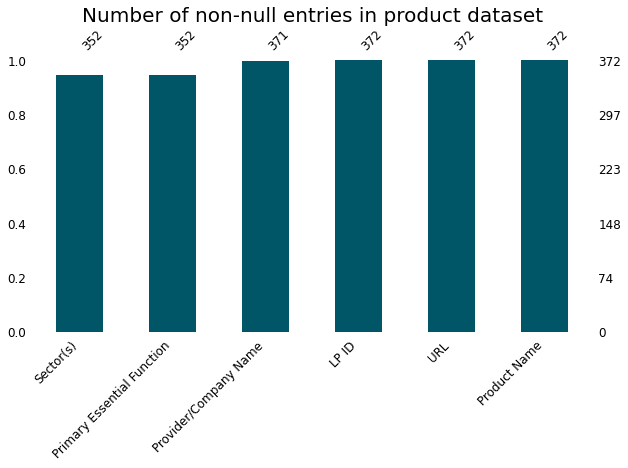

In [ ]:
msno.bar(product, color='#005666', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in product dataset", size=20) # procuct 데이터세트의 null이 아닌 항목 수
plt.show()

In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 851.6+ MB


In [ ]:
convert_dict = {'district_id': 'int64'}
engagement = engagement.astype(convert_dict)
engagement['time'] = pd.to_datetime(engagement['time'])

In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 851.6 MB


In [ ]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
mapping_state = dict(district[['district_id', 'state']].values)
mapping_locale = dict(district[['district_id', 'locale']].values)
engagement['state'] = engagement['district_id'].map(mapping_state)
engagement['locale'] = engagement['district_id'].map(mapping_locale)
engagement.head(10)

,time,lp_id,pct_access,engagement_index,district_id,state,locale
0,2020-01-01,19044.0,0.05,8.73,6104,Ohio,Suburb
1,2020-01-01,13591.0,0.00,NaN,6104,Ohio,Suburb
2,2020-01-01,55007.0,0.02,0.35,6104,Ohio,Suburb
3,2020-01-01,96116.0,0.00,NaN,6104,Ohio,Suburb
4,2020-01-01,29790.0,0.05,1.42,6104,Ohio,Suburb
5,2020-01-01,96706.0,0.01,0.71,6104,Ohio,Suburb
6,2020-01-01,78818.0,0.01,0.12,6104,Ohio,Suburb
7,2020-01-01,76889.0,0.00,NaN,6104,Ohio,Suburb
8,2020-01-01,80659.0,0.01,0.12,6104,Ohio,Suburb
9,2020-01-01,35201.0,0.01,1.06,6104,Ohio,Suburb


In [ ]:
engagement_state = engagement[['pct_access', 'engagement_index', 'state']]
engagement_locale = engagement[['pct_access', 'engagement_index', 'locale']]

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


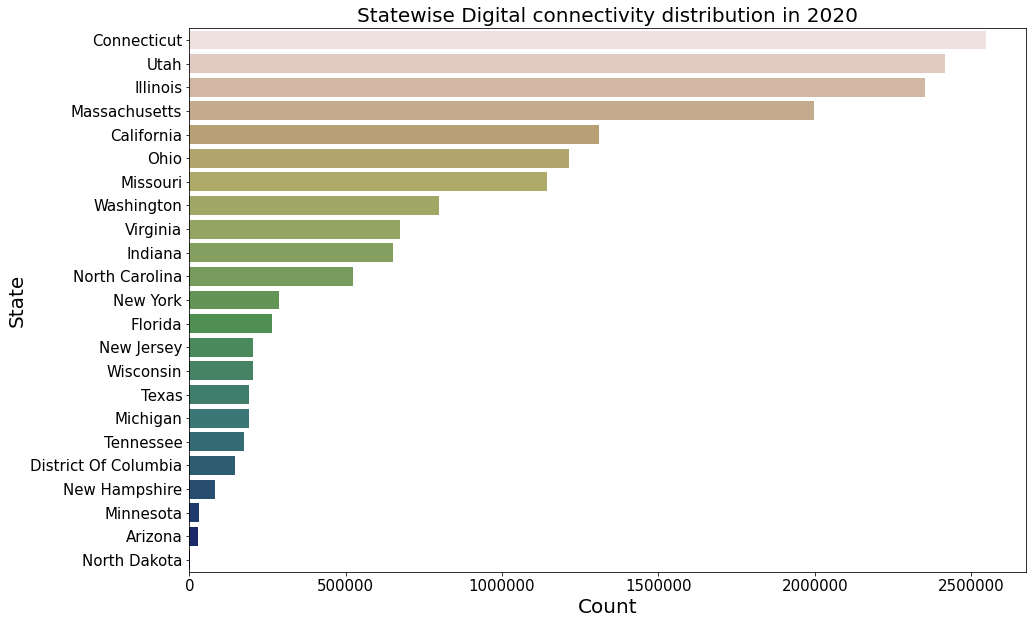

In [ ]:
plt.figure(figsize=(15, 10))
plt.ticklabel_format(style='plain')
sns.countplot(y="state",data=engagement_state, order=engagement_state.state.value_counts().index,palette="gist_earth_r",linewidth=4)
plt.title("Statewise Digital connectivity distribution in 2020", size=20) # 2020년 Statewise 디지털 연결 배포
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.show()

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


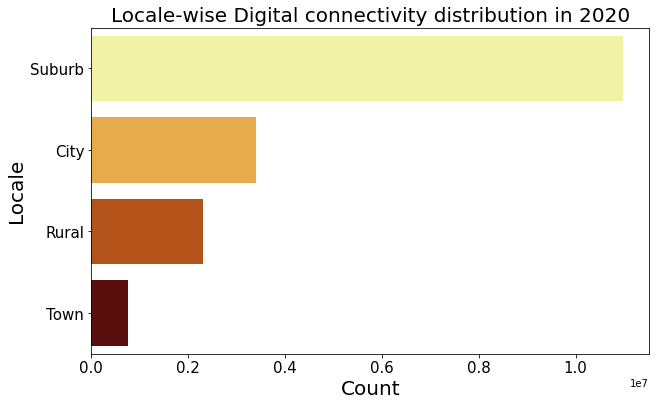

In [ ]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='sci')
sns.countplot(y="locale",data=engagement_locale,order=engagement_locale.locale.value_counts().index,palette="afmhot_r",linewidth=3)
plt.title("Locale-wise Digital connectivity distribution in 2020", size=20) # 2020년 지역별 디지털 연결 분포
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Locale', fontsize=20)
plt.show()

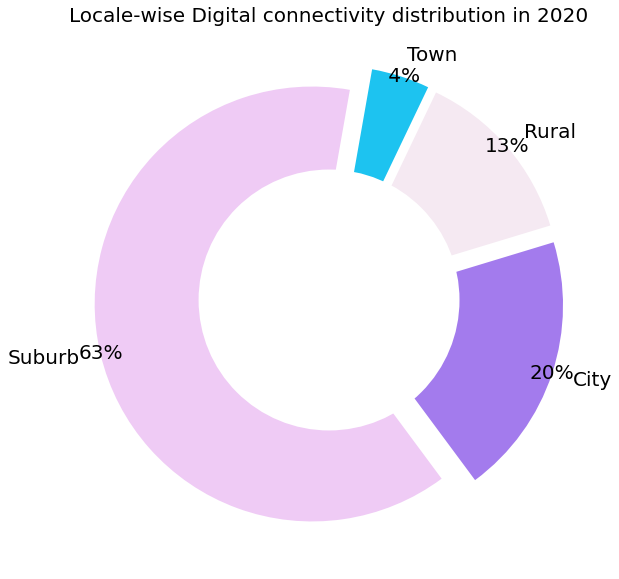

In [ ]:
fig, ax  = plt.subplots(figsize=(15, 10))
explode = (0.08, 0.08, 0.08, 0.08)
labels = list(engagement_locale.locale.value_counts().index)
sizes = engagement_locale.locale.value_counts().values
patches, texts, autotexts = ax.pie(sizes, explode=explode, startangle=80, labels=labels, autopct='%2.0f%%', pctdistance=1.0, colors=["#efcbf5","#a37bed","#f5e9f2","#1dc3f0"])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
autotexts[2].set_fontsize(20)
autotexts[3].set_fontsize(20)
ax.add_artist(plt.Circle((0,0),0.6,fc='white'))
plt.title('Locale-wise Digital connectivity distribution in 2020', fontsize = 20) # 2020년 지역별 디지털 연결 분포
plt.show()

In [ ]:
district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
district = district[district.state.notna()].reset_index(drop=True)

In [ ]:
district.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

In [ ]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

district['state_code'] = district['state'].replace(us_states)
district_by_state = district['state_code'].value_counts().to_frame().reset_index(drop=False)
district_by_state.columns = ['state_code', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "School Districts distribution per State", # 주별 학군 분포
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=district_by_state.state_code,
        zmax=2,
        z = district_by_state.num_districts,       
        locationmode = 'USA-states',  
        marker_line_color='black',
        geo='geo',
        colorscale=px.colors.sequential.Blues,          
    )
)
            
fig.update_layout(layout)   
fig.show()

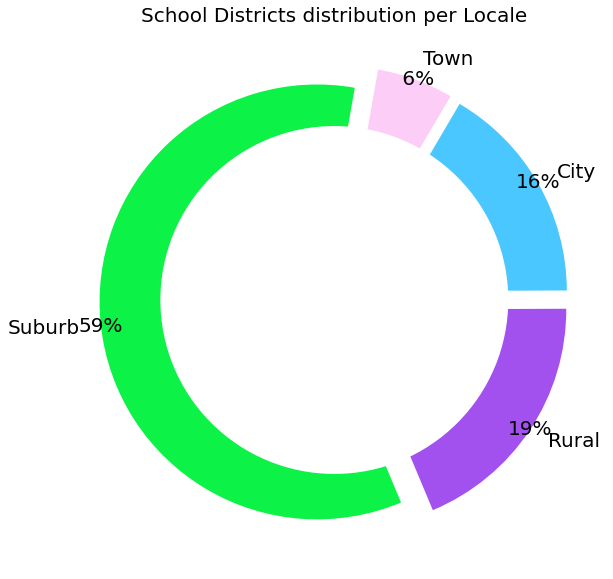

In [ ]:
fig, ax  = plt.subplots(figsize=(15, 10))
explode = (0.08, 0.08, 0.08, 0.08)
labels = list(district.locale.value_counts().index)
sizes = district.locale.value_counts().values
patches, texts, autotexts = ax.pie(sizes, explode=explode, startangle=80, labels=labels, autopct='%2.0f%%', pctdistance=1.0, colors=["#0df247","#a251ef","#4bc7ff","#fccdf6"])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
autotexts[2].set_fontsize(20)
autotexts[3].set_fontsize(20)
ax.add_artist(plt.Circle((0,0),0.8,fc='white'))
plt.title('School Districts distribution per Locale', fontsize = 20,) # 지역별 학군 분포
plt.show()

In [ ]:
product.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [ ]:
product['Sector(s)'].nunique()

5

In [ ]:
product['Primary Essential Function'].nunique()

35

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [ ]:
product['primary_essential_category'] = product['Primary Essential Function'].str.split(" - ",expand=True)[0]
product['primary_essential_subcategory'] = product['Primary Essential Function'].str.split(" - ",expand=True)[1]

In [ ]:
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,primary_essential_category,primary_essential_subcategory
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms


In [ ]:
product.drop(['Primary Essential Function'], axis = 1, inplace = True)

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


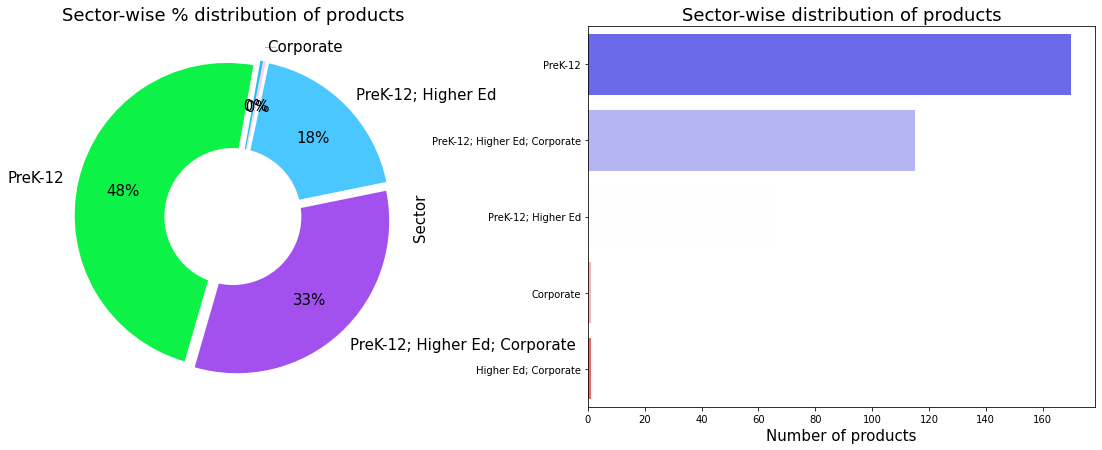

In [ ]:
plt.rcParams.update({'font.size': 15,})
fig, ax  = plt.subplots(1, 2, figsize=(20, 7))
explode = (0.04, 0.04, 0.04, 0.04, 0.04)
labels = list(product['Sector(s)'].value_counts().index)
sizes = product['Sector(s)'].value_counts().values

patches, texts, autotexts = ax[0].pie(sizes, explode=explode, startangle=80, labels=labels, autopct='%2.0f%%', pctdistance=0.7, colors=["#0df247","#a251ef","#4bc7ff","#fccdf6", "#1dc3f0"])

texts[4].set_fontsize(1)
ax[0].add_artist(plt.Circle((0,0),0.45,fc='white'))
font = {'fontname':'Georgia'}
ax[0].title.set_text('Sector-wise % distribution of products')



plt.ticklabel_format(style='plain')
sns.countplot(y="Sector(s)",data=product, ax=ax[1],order=product['Sector(s)'].value_counts().index,palette='bwr',linewidth=3)
ax[1].title.set_text("Sector-wise distribution of products")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of products', fontsize=15)
plt.ylabel('Sector', fontsize=15)

plt.show()

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


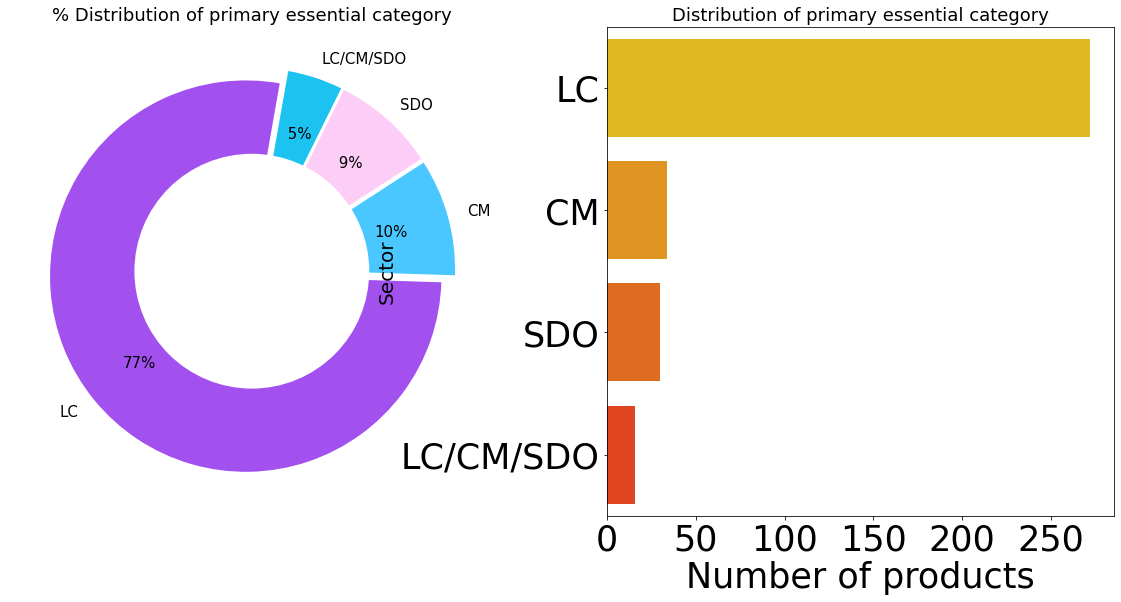

In [ ]:
fig, ax  = plt.subplots(1, 2, figsize=(20, 9))
explode = (0.04, 0.04, 0.04, 0.04)
labels = list(product['primary_essential_category'].value_counts().index)
sizes = product['primary_essential_category'].value_counts().values

patches, texts, autotexts = ax[0].pie(sizes, explode=explode, startangle=80, labels=labels, autopct='%2.0f%%', pctdistance=0.7, colors=["#a251ef","#4bc7ff","#fccdf6", "#1dc3f0"])


ax[0].add_artist(plt.Circle((0,0),0.6,fc='white'))
ax[0].title.set_text('% Distribution of primary essential category')

plt.ticklabel_format(style='plain')
sns.countplot(y="primary_essential_category",data=product, ax=ax[1],order=product['primary_essential_category'].value_counts().index,palette='autumn_r', linewidth=3)
ax[1].title.set_text("Distribution of primary essential category")
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Number of products', fontsize=35)
plt.ylabel('Sector', fontsize=20)

plt.show()

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


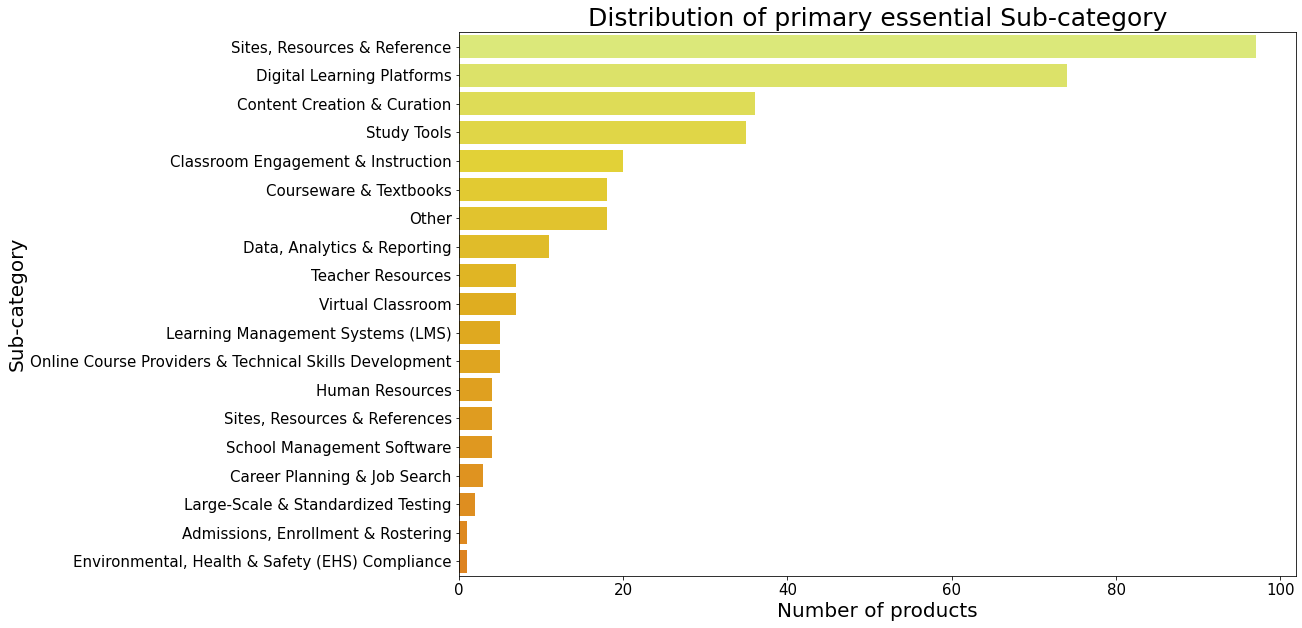

In [ ]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain')
sns.countplot(y="primary_essential_subcategory",data=product,order=product['primary_essential_subcategory'].value_counts().index,palette="Wistia")
plt.title("Distribution of primary essential Sub-category",fontsize=25) # 기본 필수 하위 범주의 분포
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of products', fontsize=20)
plt.ylabel('Sub-category', fontsize=20)

plt.show()

In [ ]:
product.nunique()

LP ID                            372
URL                              372
Product Name                     372
Provider/Company Name            290
Sector(s)                          5
primary_essential_category         4
primary_essential_subcategory     19
dtype: int64

In [ ]:
engagement.time.nunique()

366

Text(0.5, 1.0, 'Districts with unique days of engagement ')

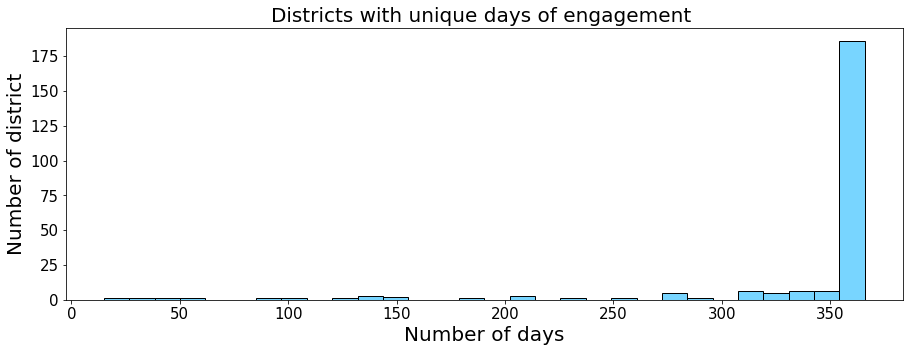

In [ ]:
plt.figure(figsize=(15,5))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30, color = '#4bc7ff')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of days', fontsize=20)
plt.ylabel('Number of district', fontsize=20)
plt.title('Districts with unique days of engagement ', fontsize = 20)

In [ ]:
lp_id_virtual = product[product.primary_essential_subcategory == 'Virtual Classroom']['LP ID'].unique()

In [ ]:
lp_id_virtual

array([48333, 32050, 61945, 18982, 99580, 98845, 22767])

In [ ]:
def annotation_line( ax, xmin, xmax, y, text, ytext=150, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext==0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20
    ax.annotate( text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize)

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


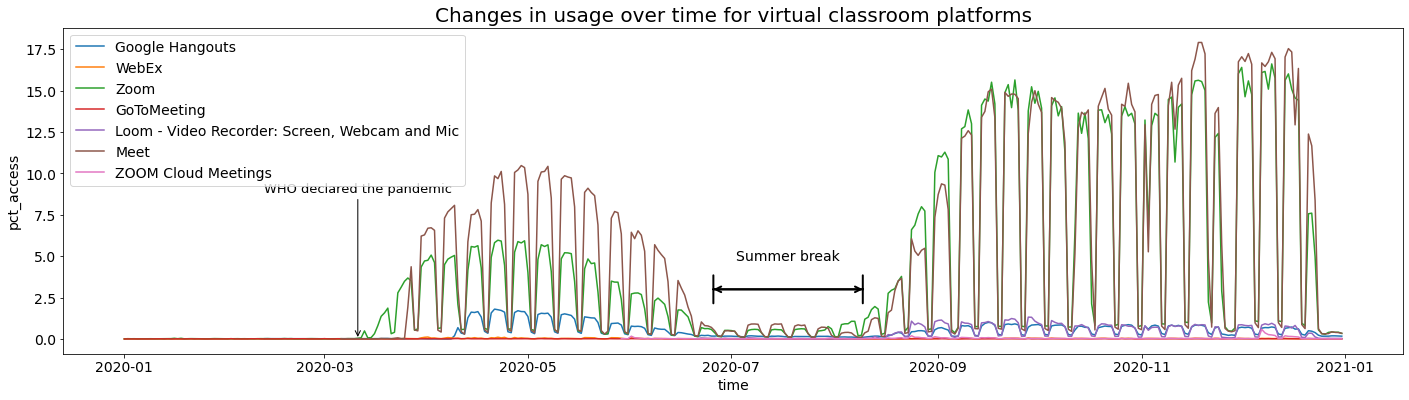

In [ ]:
plt.rcParams.update({'font.size': 14,})
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_virtual:
    day = engagement[engagement.lp_id == product_id].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=day.time, y=day.pct_access, label=product[product['LP ID'] == product_id]['Product Name'].values[0])

ax.annotate('WHO declared the pandemic',
            xy =( np.datetime64('2020-03-11'), 0),
            xycoords='data',
            xytext=(0, 150),
            size = 13,
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center')

annotation_line( ax=ax, text='Summer break', xmin=np.datetime64('2020-06-25'), xmax=np.datetime64('2020-08-10'),
                    y=3, ytext=5, linewidth=2, linecolor='black', fontsize=14 )

plt.legend()
plt.title('Changes in usage over time for virtual classroom platforms', fontsize = 20) # 가상 교실 플랫폼에 대한 시간 경과에 따른 사용 변화
plt.show()

In [ ]:
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_updated = engagement[engagement.weekday < 5]

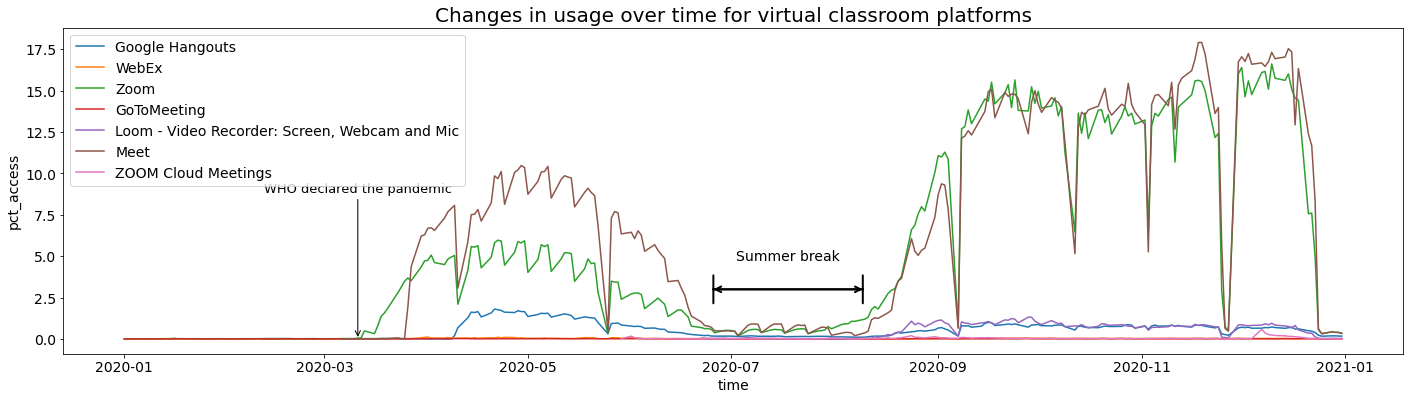

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_virtual:
    day = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=day.time, y=day.pct_access, label=product[product['LP ID'] == product_id]['Product Name'].values[0])

ax.annotate('WHO declared the pandemic',
            xy =( np.datetime64('2020-03-11'), 0),
            xycoords='data',
            xytext=(0, 150),
            size = 13,
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center')

annotation_line( ax=ax, text='Summer break', xmin=np.datetime64('2020-06-25'), xmax=np.datetime64('2020-08-10'),
                    y=3, ytext=5, linewidth=2, linecolor='black', fontsize=14 )

plt.legend()
plt.title('Changes in usage over time for virtual classroom platforms', fontsize = 20) # 가상 교실 플랫폼에 대한 시간 경과에 따른 사용 변화
plt.show()

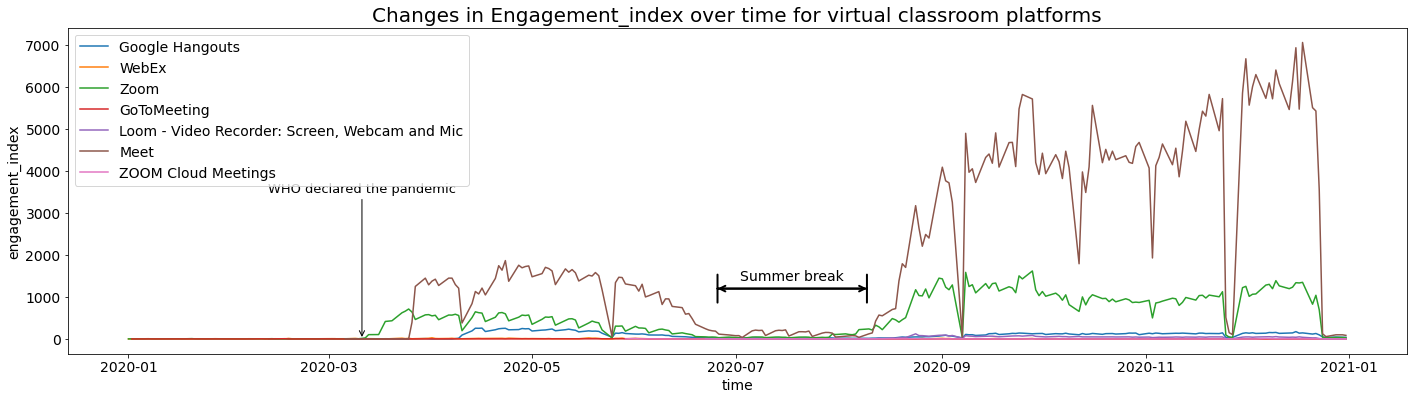

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for product_id in lp_id_virtual:
    day = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=day.time, y=day.engagement_index, label=product[product['LP ID'] == product_id]['Product Name'].values[0])

ax.annotate('WHO declared the pandemic',
            xy =( np.datetime64('2020-03-11'), 0),
            xycoords='data',
            xytext=(0, 150),
            size = 13,
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center')

annotation_line( ax=ax, text='Summer break', xmin=np.datetime64('2020-06-25'), xmax=np.datetime64('2020-08-10'),
                    y=1200, ytext=1500, linewidth=2, linecolor='black', fontsize=14 )

plt.legend()
plt.title('Changes in Engagement_index over time for virtual classroom platforms', fontsize = 20) # 가상 교실 플랫폼에 대한 시간 경과에 따른 Engagement_index의 변경 사항
plt.show()

In [ ]:
engagement.lp_id.head()

0    19044.0
1    13591.0
2    55007.0
3    96116.0
4    29790.0
Name: lp_id, dtype: float64

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


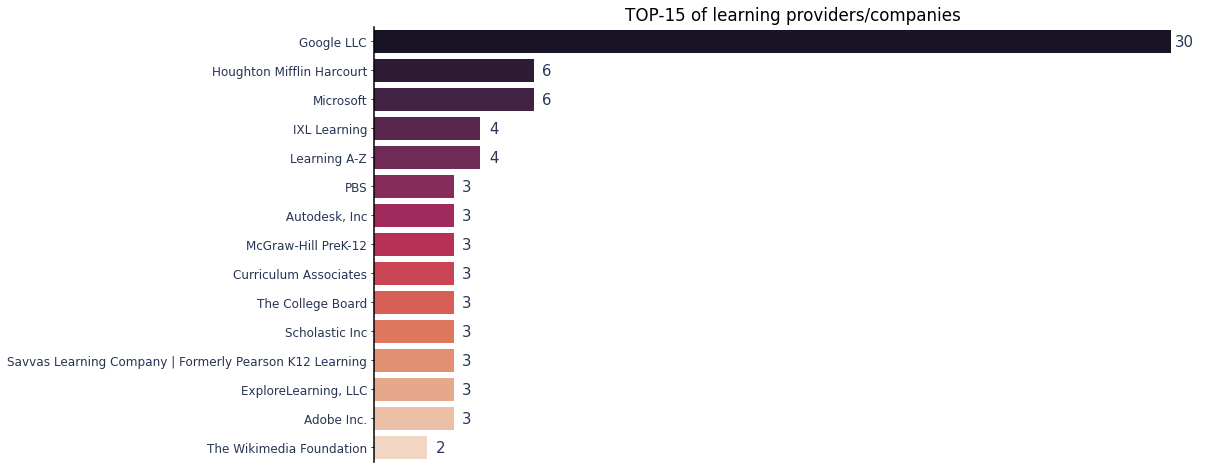

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('TOP-15 of learning providers/companies')
a = sns.barplot(data = product['Provider/Company Name'].value_counts().reset_index().head(15), x = 'Provider/Company Name', y = 'index', palette='rocket')
plt.xticks([])
plt.yticks(fontname = 'arial', fontsize = 12, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'arial', fontsize = 15, color = '#283655')
plt.show()

In [ ]:
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_essential_category,primary_essential_subcategory
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


In [ ]:
df_prod_x=product
df_prod_x.dropna(axis=0,how='any',inplace=True)

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


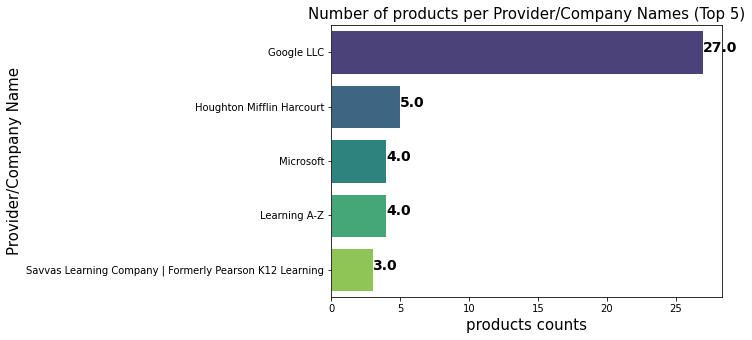

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharey=True)
sns.countplot(y = 'Provider/Company Name', 
              data = df_prod_x, 
              edgecolor="white",
              palette="viridis",#"rocket_r",
              order = product['Provider/Company Name'].value_counts().index[:5])

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f"% rect.get_width(), weight='bold' )

plt.xticks(size=10)
plt.yticks(size=10)
plt.ylabel("Provider/Company Name",size=15)
plt.xlabel("products counts",size=15)
plt.title('Number of products per Provider/Company Names (Top 5)',size=15)

plt.show()

Provider/Company Names 


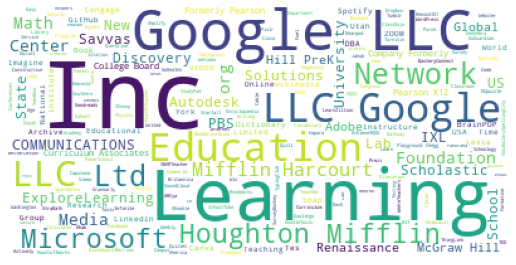





 Product Names 


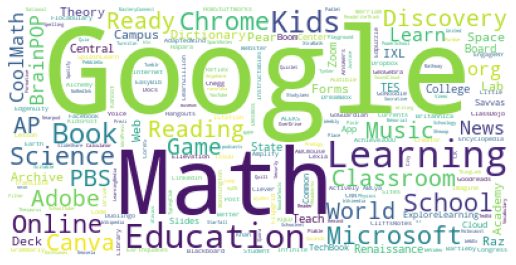

In [ ]:
print('Provider/Company Names ')
cloud = WordCloud(max_words=500,background_color="white").generate(" ".join(df_prod_x['Provider/Company Name'].astype(str)))
plt.figure(figsize=(9,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()

print('\n\n\n\n Product Names ')
cloud = WordCloud(max_words=1000,background_color="white").generate(" ".join(df_prod_x['Product Name'].astype(str)))
plt.figure(figsize=(9,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
df_prod_x.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_essential_category,primary_essential_subcategory
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


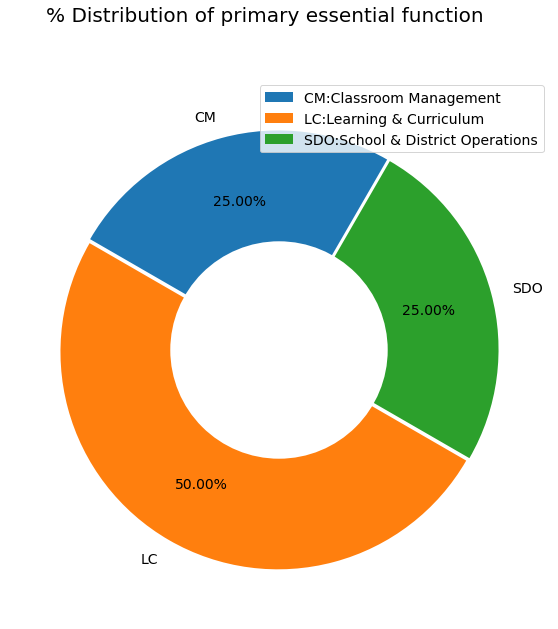

In [ ]:
s1=0
s2=0
s3=0
for s in df_prod_x["primary_essential_category"]:
    if(not pd.isnull(s)):
        s1 = s.count("CM")+1
        s2 = s.count("LC")+1
        s3 = s.count("SDO")+1

fig, ax  = plt.subplots(figsize=(16, 10))
fig.suptitle('% Distribution of primary essential function', fontsize=20)
explode = (0.01, 0.01, 0.01)
labels = ['CM','LC','SDO']
sizes = [s1,s2,s3]
ax.pie(sizes,
       startangle=60,
       explode=explode, -
       labels=labels,
       autopct='%1.2f%%', 
       pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.5,fc='white'))
subgroup_names_legs=['CM:Classroom Management', 'LC:Learning & Curriculum', 'SDO:School & District Operations']
plt.legend(subgroup_names_legs,loc='best')
plt.show()